In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('model_data.csv')

In [3]:
data=data.iloc[:,1:]

In [4]:
data.drop(['MINIMUM_SPEED','MAXIMUM_SPEED','AVERAGE_SPEED','DATE','M1','M2','M3','M1_P','M2_P','M3_P','distance'],axis=1,inplace=True)

In [5]:
Y = data.iloc[:,41:42]
Y

,yogunluk
0,1.000000
1,1.000000
2,0.921039
3,0.998471
4,0.948718
...,...
749995,1.000000
749996,1.000000
749997,0.978780
749998,0.922692


In [11]:
Y.describe()

,yogunluk
count,750000.000000
mean,0.967245
std,0.047508
min,0.000000
25%,0.950748
50%,0.983740
75%,1.000000
max,1.000000


In [91]:
#number of vechiles in Istanbul traffic
nov_traffic = X.iloc[:,-1:]

std_traffic =  np.std(nov_traffic)
print("Number of Vechiles Standard Deviation : ", std_traffic)
print("Number of Vechiles count: ", nov_traffic.sum())

Number of Vechiles Standard Deviation :  NUMBER_OF_VEHICLES    96.84808
dtype: float64
Number of Vechiles count:  NUMBER_OF_VEHICLES    65050119
dtype: int64


In [6]:
X = data.drop(['yogunluk'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Friday               750000 non-null  float64
 1   Monday               750000 non-null  float64
 2   Saturday             750000 non-null  float64
 3   Sunday               750000 non-null  float64
 4   Thursday             750000 non-null  float64
 5   Tuesday              750000 non-null  float64
 6   Wednesday            750000 non-null  float64
 7   April                750000 non-null  float64
 8   August               750000 non-null  float64
 9   December             750000 non-null  float64
 10  February             750000 non-null  float64
 11  January              750000 non-null  float64
 12  July                 750000 non-null  float64
 13  June                 750000 non-null  float64
 14  March                750000 non-null  float64
 15  May              

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.2, random_state=7)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_predict_yagıslı = model.predict(X_test[X_test['SİDDETLİ YAGIS']==1.0])
y_predict_yagıssız = model.predict(X_test[X_test['YAGISSIZ']==1.0])

In [13]:
idx= X_test[X_test['SİDDETLİ YAGIS']==1.0].index
idx2= X_test[X_test['YAGISSIZ']==1.0].index

In [14]:
ytest_yagıslı = Y_test[Y_test.index.isin(idx)]
ytest_yagıssız =Y_test[Y_test.index.isin(idx2)]

In [15]:
X_train_yagıs = X_train[X_train['SİDDETLİ YAGIS']==1.0]
X_train_yagıssız = (X_train[X_train['YAGISSIZ']==1.0])

In [16]:
X_test_yagıs = X_test[X_test['SİDDETLİ YAGIS']==1.0]
X_test_yagıssız = (X_test[X_test['YAGISSIZ']==1.0])

In [17]:
idx3= X_train[X_train['SİDDETLİ YAGIS']==1.0].index
idx4= X_train[X_train['YAGISSIZ']==1.0].index

In [18]:
ytrain_yagıslı = Y_train[Y_train.index.isin(idx3)]
ytrain_yagıssız =Y_train[Y_train.index.isin(idx4)]

In [19]:
print("Test  R^2 Score : ", model.score(X_test_yagıs, ytest_yagıslı))

Test  R^2 Score :  0.09799922765041447


In [20]:
print("Train R^2 Score : ", model.score(X_train_yagıssız, ytrain_yagıssız))

Train R^2 Score :  0.16753680804937698


(array([ 12.,   0.,  12.,   9.,   7.,   4.,  12.,  30.,  12.,   3.,  13.,
          7.,   8.,   6.,   9.,  27.,  20.,  34., 199.,  50.,  56.,  99.,
         90., 167., 295., 492., 182., 685., 458., 612., 834., 472., 347.,
        344., 351., 174., 264.,  86.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.,   2.,   0.,   4.,   7.]),
 array([0.90832517, 0.91010672, 0.91188828, 0.91366983, 0.91545139,
        0.91723294, 0.9190145 , 0.92079605, 0.92257761, 0.92435916,
        0.92614072, 0.92792227, 0.92970383, 0.93148538, 0.93326694,
        0.93504849, 0.93683005, 0.9386116 , 0.94039316, 0.94217471,
        0.94395627, 0.94573782, 0.94751938, 0.94930093, 0.95108249,
        0.95286404, 0.9546456 , 0.95642715, 0.95820871, 0.95999026,
        0.96177182, 0.96355337, 0.96533493, 0.96711648, 0.96889804,
        0.97067959, 0.97246115, 0.9742427 , 0.97602426, 0.97780581,
        0.97958737, 0.98136892, 0.98315048, 0.

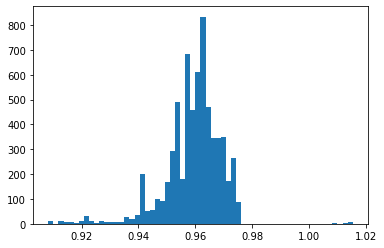

In [21]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(y_predict_yagıslı,bins=60)

(array([1.7000e+01, 9.0000e+00, 1.3000e+01, 0.0000e+00, 0.0000e+00,
        5.0000e+00, 1.4000e+01, 1.1000e+01, 1.5000e+01, 5.0000e+00,
        9.0000e+00, 2.0000e+01, 2.0000e+01, 1.9000e+01, 2.3000e+01,
        1.9000e+01, 5.3000e+01, 3.1000e+01, 2.7000e+01, 2.5000e+01,
        4.6000e+01, 4.8000e+01, 1.7000e+01, 2.7000e+01, 3.8000e+01,
        4.7000e+01, 7.3000e+01, 6.9000e+01, 1.2100e+02, 1.8000e+02,
        2.6200e+02, 3.4200e+02, 4.5900e+02, 3.4600e+02, 3.8900e+02,
        4.6500e+02, 7.5900e+02, 1.7780e+03, 1.8120e+03, 5.4660e+03,
        1.3895e+04, 8.9060e+03, 9.2710e+03, 1.1790e+04, 9.8160e+03,
        9.2270e+03, 6.7740e+03, 5.8120e+03, 5.5270e+03, 1.0248e+04,
        9.9290e+03, 4.9410e+03, 2.8420e+03, 2.2940e+03, 1.7980e+03,
        1.0310e+03, 5.7300e+02, 1.2460e+03, 1.2780e+03, 3.7100e+02]),
 array([0.80351106, 0.80714473, 0.8107784 , 0.81441207, 0.81804574,
        0.82167941, 0.82531308, 0.82894674, 0.83258041, 0.83621408,
        0.83984775, 0.84348142, 0.84711509, 0.

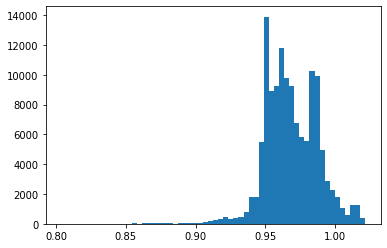

In [22]:
plt.hist(y_predict_yagıssız ,bins=60)

In [23]:
pred_yagıslı= pd.DataFrame(y_predict_yagıslı)

pred_yagıslı.describe(percentiles=[0.15,0.40,0.60,0.80])

,0
count,6499.000000
mean,0.959365
std,0.010085
min,0.908325
15%,0.951703
40%,0.958634
50%,0.960664
60%,0.962408
80%,0.966798
max,1.015218


In [24]:
import numpy as np
pred_yagıslı['categorical'] = np.nan
pred_yagıslı= pred_yagıslı.rename(columns={0:'density'})

In [25]:
def freq_cate(x):
    if x < 0.93:
        x = 'AZ_YOGUN'
        
    elif 0.93 <= x < 0.965:
        x = 'YOGUN'
        
    elif 0.965 <= x < 0.98:
        x = 'COK_YOGUN'
    
    elif x > 0.98:
        x = 'DOLU'

    return x  


pred_yagıslı['categorical'] = pred_yagıslı['density'].apply(lambda x : freq_cate(x))

In [26]:
pred_yagıslı

,density,categorical
0,0.963261,YOGUN
1,0.961608,YOGUN
2,0.952309,YOGUN
3,0.960664,YOGUN
4,0.970546,COK_YOGUN
...,...,...
6494,0.962395,YOGUN
6495,0.967759,COK_YOGUN
6496,0.960240,YOGUN
6497,0.958491,YOGUN


In [27]:
data_yagıslı = X_test[X_test['SİDDETLİ YAGIS']==1.0]

In [28]:
data_yagıslı

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,...,23,NUMBER_OF_PASSENGER,YAGISSIZ,HAFİF YAGIS,SİDDETLİ YAGIS,mac,derbi,RELIGIOUS_HOLIDAY,OFFICAL_HOLIDAY,NUMBER_OF_VEHICLES
180536,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000079,0.0,0.0,1.0,1.0,0.0,0.0,0.0,21
440968,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15
216749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000305,0.0,0.0,1.0,0.0,0.0,0.0,0.0,78
616065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000383,0.0,0.0,1.0,0.0,0.0,0.0,0.0,47
188209,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000049,0.0,0.0,1.0,1.0,0.0,0.0,0.0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431210,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.005325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46
498465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.027949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46
196362,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.006562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25
416012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.010423,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30


In [29]:
pred_yagıssız= pd.DataFrame(y_predict_yagıssız)

pred_yagıssız.describe(percentiles=[0.15,0.40,0.60,0.80])


,0
count,130648.000000
mean,0.968264
std,0.019555
min,0.803511
15%,0.950634
40%,0.962189
50%,0.966343
60%,0.971936
80%,0.985227
max,1.021531


In [30]:
pred_yagıssız['categorical'] = np.nan
pred_yagıssız= pred_yagıssız.rename(columns={0:'density'})

In [31]:
pred_yagıssız['categorical'] = pred_yagıssız['density'].apply(lambda x : freq_cate(x))

In [32]:
data_yagıssız = X_test[X_test['YAGISSIZ']==1.0]

In [33]:
pred_yagıssız

,density,categorical
0,0.984557,DOLU
1,0.963840,YOGUN
2,0.961665,YOGUN
3,0.957964,YOGUN
4,0.947209,YOGUN
...,...,...
130643,0.975822,COK_YOGUN
130644,0.967822,COK_YOGUN
130645,0.949458,YOGUN
130646,0.963578,YOGUN


In [81]:
traffic_yagıssız= pd.concat([data_yagıssız.reset_index(drop=True),pred_yagıssız], axis = 1)

In [82]:
traffic_yagıslı= pd.concat([data_yagıslı.reset_index(drop=True),pred_yagıslı], axis = 1)

In [56]:
traffic_yagıslı.to_csv('linearReg_yagmurlu_traffic.csv')

In [57]:
traffic_yagıssız.to_csv('linearReg_yagmursuz_traffic.csv')

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np
import statsmodels.api as sm

class Traffic:
    
    def __init__(self, data):
        self.data = data
        
    
    def traffic_data_score(self):

        self.data.drop(['density'],axis=1,inplace=True)
        self.Y = self.data.iloc[:,-2:-1]
        self.data.drop(['NUMBER_OF_VEHICLES'],axis=1 , inplace=True)



        labelencoder = LabelEncoder()

        self.data['categorical'] = labelencoder.fit_transform(self.data['categorical'])
        self.data.rename(columns={"categorical": "density_categorical"}, inplace=True)


        X_train, X_test, Y_train, Y_test = train_test_split(self.data, self.Y,  test_size=0.2, random_state=7)


        self.model = LinearRegression()
        self.model.fit(X_train, Y_train)

        y_pred = self.model.predict(X_test)
        
        #statsmodel libary has using for simple linear regression
        self.stats_model = sm.OLS(self.Y, self.data).fit()
        
        #calculate sse (Sum of Squares Total)
        self.sse = np.sum((self.stats_model.fittedvalues - self.Y['NUMBER_OF_VEHICLES'])**2)

        #calculate ssr (Sum of Squares Regression)
        self.ssr = np.sum((self.stats_model.fittedvalues - self.Y['NUMBER_OF_VEHICLES'].mean())**2)
    
        #calculate sst (Sum of Squares Total)
        self.sst = self.ssr + self.sse
        
        
        self.equal_r2 = 1-(self.sse/self.sst)
        
        #Standard Deviation 
        self.sd = np.std(y_pred)

        #Variance
        self.variance = np.var(y_pred)
        
        print("r2 Score : ", self.equal_r2)
        
        print("Test  R^2 Score : ", self.model.score(X_test, Y_test))
        print("Train R^2 Score : ", self.model.score(X_train, Y_train))
    
        print("Sse Score : " ,self.sse)
        print("Ssr Score : " ,self.ssr)
        print("Sst Score : " ,self.sst)
        
        print("Number of Vechiles predict Standard Deviation : ", self.sd)
        print("Number of Vechiles predict Variance : ", self.variance)
        print("Number of Vechiles predict mean : ", y_pred.sum())
       
        

traffic_yagıssız_obj = Traffic(traffic_yagıssız)
traffic_yagıslı_obj = Traffic(traffic_yagıslı)

In [84]:
traffic_yagıssız_obj.traffic_data_score()

r2 Score :  0.061002432874923795
Test  R^2 Score :  0.062187447090435444
Train R^2 Score :  0.0606533562841538
Sse Score :  1136470513.7597308
Ssr Score :  73831358.73527099
Sst Score :  1210301872.4950018
Number of Vechiles Standard Deviation :         NUMBER_OF_VEHICLES
count       130648.000000
mean            86.814854
std             96.249201
min             11.000000
25%             27.000000
50%             54.000000
75%            105.000000
max            956.000000
Number of Vechiles Standard Deviation :  NUMBER_OF_VEHICLES    96.248832
dtype: float64
Number of Vechiles predict Standard Deviation :  23.480287153099972
Number of Vechiles predict Variance :  551.3238847920317
Number of Vechiles predict mean :  2273107.6279296875


In [85]:
traffic_yagıslı_obj.traffic_data_score()

r2 Score :  0.08052648134718621
Test  R^2 Score :  0.06866855033151498
Train R^2 Score :  0.0826834365447674
Sse Score :  49739424.49485843
Ssr Score :  4356124.192324211
Sst Score :  54095548.68718264
Number of Vechiles Standard Deviation :         NUMBER_OF_VEHICLES
count         6499.000000
mean            82.530543
std             91.241184
min             11.000000
25%             28.000000
50%             52.000000
75%             97.000000
max            700.000000
Number of Vechiles Standard Deviation :  NUMBER_OF_VEHICLES    91.234164
dtype: float64
Number of Vechiles predict Standard Deviation :  26.27726537166713
Number of Vechiles predict Variance :  690.4946754130166
Number of Vechiles predict mean :  107305.671875


In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

traffic_yagmurlu = pd.read_csv('linearReg_yagmurlu_traffic.csv',)

traffic_yagmurlu = traffic_yagmurlu.iloc[:,1:]

traffic_yagmurlu

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,...,YAGISSIZ,HAFİF YAGIS,SİDDETLİ YAGIS,mac,derbi,RELIGIOUS_HOLIDAY,OFFICAL_HOLIDAY,NUMBER_OF_VEHICLES,density,categorical
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,21,0.963261,YOGUN
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15,0.961608,YOGUN
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,78,0.952309,YOGUN
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,47,0.960664,YOGUN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,62,0.970546,COK_YOGUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46,0.962395,YOGUN
6495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46,0.967759,COK_YOGUN
6496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25,0.960240,YOGUN
6497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30,0.958491,YOGUN


In [14]:
traffic_yagmurlu.drop(['categorical'],axis=1,inplace=True)

In [16]:
traffic_yagmurlu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Friday               6499 non-null   float64
 1   Monday               6499 non-null   float64
 2   Saturday             6499 non-null   float64
 3   Sunday               6499 non-null   float64
 4   Thursday             6499 non-null   float64
 5   Tuesday              6499 non-null   float64
 6   Wednesday            6499 non-null   float64
 7   April                6499 non-null   float64
 8   August               6499 non-null   float64
 9   December             6499 non-null   float64
 10  February             6499 non-null   float64
 11  January              6499 non-null   float64
 12  July                 6499 non-null   float64
 13  June                 6499 non-null   float64
 14  March                6499 non-null   float64
 15  May                  6499 non-null   f

In [17]:
input_choice = traffic_yagmurlu.iloc[2:3,:]    # data generate ediliyor 
input_choice

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,...,NUMBER_OF_PASSENGER,YAGISSIZ,HAFİF YAGIS,SİDDETLİ YAGIS,mac,derbi,RELIGIOUS_HOLIDAY,OFFICAL_HOLIDAY,NUMBER_OF_VEHICLES,density
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000305,0.0,0.0,1.0,0.0,0.0,0.0,0.0,78,0.952309


In [18]:
data = traffic_yagmurlu.drop(traffic_yagmurlu.index[2])  # input olarak datada olmayan veriyi vermek icin gerceklestirilen islem
data

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,...,NUMBER_OF_PASSENGER,YAGISSIZ,HAFİF YAGIS,SİDDETLİ YAGIS,mac,derbi,RELIGIOUS_HOLIDAY,OFFICAL_HOLIDAY,NUMBER_OF_VEHICLES,density
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.000079,0.0,0.0,1.0,1.0,0.0,0.0,0.0,21,0.963261
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15,0.961608
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000383,0.0,0.0,1.0,0.0,0.0,0.0,0.0,47,0.960664
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000049,0.0,0.0,1.0,1.0,0.0,0.0,0.0,62,0.970546
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.000314,0.0,0.0,1.0,1.0,0.0,0.0,0.0,20,0.964153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.005325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46,0.962395
6495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.027949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,46,0.967759
6496,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.006562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25,0.960240
6497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.010423,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30,0.958491


In [19]:
def norm_target_features(data,input_target):

    data_scaler = data.append(input_target, ignore_index = True)   #inputu ana data'ya ekliyoruz standart Scalere yapabilmek icin

    scaler = StandardScaler()
    scaled = scaler.fit_transform(data_scaler)

    scaled_df = pd.DataFrame(scaled,columns=data_scaler.columns)

    input_scaled = scaled_df.iloc[-1:,:].T  

    normdf_table={}

    for column in scaled_df:

        x = scaled_df[str(column)]

        norm_target_array = min(np.linalg.norm((x.to_numpy()-input_scaled.to_numpy()), axis=0))
        
        normdf_table.setdefault(column +"_norm", []).append(norm_target_array)
    
    return normdf_table
    

In [20]:
norm_target_features(data,input_choice)

{'Friday_norm': [4.085727109611517],
 'Monday_norm': [3.8556922978461774],
 'Saturday_norm': [3.6333786448663283],
 'Sunday_norm': [3.380110447783442],
 'Thursday_norm': [4.447834984607008],
 'Tuesday_norm': [4.607886454269],
 'Wednesday_norm': [3.7816520620439205],
 'April_norm': [3.255452552037162],
 'August_norm': [3.187804412057038],
 'December_norm': [3.187804412057038],
 'February_norm': [3.160267938466501],
 'January_norm': [3.187804412057038],
 'July_norm': [3.187804412057038],
 'June_norm': [3.187804412057038],
 'March_norm': [3.187804412057038],
 'May_norm': [3.187804412057038],
 'November_norm': [3.187804412057038],
 'October_norm': [3.187804412057038],
 'September_norm': [3.187804412057038],
 '06_norm': [3.160267938466501],
 '07_norm': [3.187804412057038],
 '08_norm': [3.187804412057038],
 '09_norm': [3.187804412057038],
 '10_norm': [3.187804412057038],
 '11_norm': [3.187804412057038],
 '12_norm': [3.187804412057038],
 '13_norm': [3.187804412057038],
 '14_norm': [3.18780441